# Chapter 1: Python's Scientific Stack

Python itself does not come with any scientific algorithms. However, over time, many third-party libraries emerged that are useful to build machine learning applications. In this context, "third-party" means that the libraries are *not* part of Python's standard library.

Among the popular ones are [numpy](https://numpy.org/) (numerical computations, linear algebra), [pandas](https://pandas.pydata.org/) (data processing), [matplotlib](https://matplotlib.org/) (visualisations), and [scikit-learn](https://scikit-learn.org/stable/index.html) (machine learning algorithms).

### Extending Core Python with Third-party Packages

Before we can import these libraries, we must ensure that they installed on our computers. If you installed Python via the Anaconda Distribution that should already be the case. Otherwise, we can use Python's **package manager** `pip` to install them manually.

`pip` is a so-called command-line interface (CLI), meaning it is a program that is run within a terminal window. JupyterLab allows us to run such a CLI tool from within a notebook by starting a code cell with a single `%` symbol. Here, this does not mean Python's modulo operator but is just an instruction to JupyterLab that the following code is *not* Python.

In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


After we have ensured that the third-party libraries are installed locally, we can simply go ahead with the `import` statement. All the libraries are commonly imported with shorter prefixes for convenient use later on.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's see how the data type provided by these scientific libraries differ from Python's built-in ones.

As an example, we create a `list` object similar to the one from Chapter 0.

In [6]:
vector = [1, 2, 3]

vector

[1, 2, 3]

We call the `list` object by the name `vector` as that is what the data mean conceptually. As we remember from our linear algebra courses, vectors should implement scalar-multiplication. So, the following code cell should result in `[3, 6, 9]` as the answer. Surprisingly, the result is a new `list` with all the elements in `vector` repeated three times. That operation is called **concatenation** and is an example of a concept called **operator overloading**. That means that an operator, like `*` in the example, may exhibit a different behavior depending on the data type of its operands.

In [7]:
3 * vector

[1, 2, 3, 1, 2, 3, 1, 2, 3]

`numpy`, among others, provides a data type called an **n-dimensional array**. This may sound fancy at first but when used with only 1 or 2 dimensions, it basically represents vectors and matrices as we know them from linear algebra. Additionally, arrays allow for much faster computations as they are implemented in the very efficient [C language](https://en.wikipedia.org/wiki/C_%28programming_language%29) and optimized for numerical operations.

To create an array, we use the [array()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html#numpy-array) constructor from the imported `np` module and provide it with a `list` of values.

In [8]:
v1 = np.array([1, 2, 3])

v1

array([1, 2, 3])

The vector `v1` can now be multiplied with a scalar yielding a result meaningful in the context of linear algebra.

In [9]:
v2 = 3 * v1

v2

array([3, 6, 9])

To create a matrix, we just use a `list` of (row) `list`s of values.

In [10]:
m1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

m1

array([[1, 2, 3],
       [4, 5, 6]])

Now we can use `numpy`'s `dot()` function to multiply a matrix with a vector to obtain a new vector ...

In [11]:
v3 = np.dot(m1, v1)

v3

array([14, 32])

... or simply transpose it by accessing its `.T` attribute.

In [12]:
m1.T

array([[1, 4],
       [2, 5],
       [3, 6]])

The rules from maths still apply and it makes a difference if a vector is multiplied from the left or the right by a matrix. The following operation will fail.

In [13]:
np.dot(v1, m1)

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In order to retrieve only a **slice** (i.e., subset) of an array's data, we index into it. For example, the first row of the matrix is ...

In [14]:
m1[0, :]

array([1, 2, 3])

... while the second column is:

In [15]:
m1[:, 1]

array([2, 5])

To acces the lowest element in the right column, two indices can be used.

In [16]:
m1[1, 2]

6

`numpy` also provides various other functions and constants, such as `linspace()` to create an array of equidistant numbers, `sin()` to calculate the sinus values for all numbers in an array, or simple an approximation for `pi`. To further illustrate the concept of **vectorization**, let us calculate the sinus curve over a range of 100 values, going from negative to positive $3\pi$.

In [17]:
x = np.linspace(-3 * np.pi, 3 * np.pi, 100)

x

array([-9.42477796, -9.23437841, -9.04397885, -8.8535793 , -8.66317974,
       -8.47278019, -8.28238063, -8.09198108, -7.90158152, -7.71118197,
       -7.52078241, -7.33038286, -7.1399833 , -6.94958375, -6.75918419,
       -6.56878464, -6.37838508, -6.18798553, -5.99758598, -5.80718642,
       -5.61678687, -5.42638731, -5.23598776, -5.0455882 , -4.85518865,
       -4.66478909, -4.47438954, -4.28398998, -4.09359043, -3.90319087,
       -3.71279132, -3.52239176, -3.33199221, -3.14159265, -2.9511931 ,
       -2.76079354, -2.57039399, -2.37999443, -2.18959488, -1.99919533,
       -1.80879577, -1.61839622, -1.42799666, -1.23759711, -1.04719755,
       -0.856798  , -0.66639844, -0.47599889, -0.28559933, -0.09519978,
        0.09519978,  0.28559933,  0.47599889,  0.66639844,  0.856798  ,
        1.04719755,  1.23759711,  1.42799666,  1.61839622,  1.80879577,
        1.99919533,  2.18959488,  2.37999443,  2.57039399,  2.76079354,
        2.9511931 ,  3.14159265,  3.33199221,  3.52239176,  3.71

In [18]:
y = np.sin(x)

y

array([-3.67394040e-16, -1.89251244e-01, -3.71662456e-01, -5.40640817e-01,
       -6.90079011e-01, -8.14575952e-01, -9.09631995e-01, -9.71811568e-01,
       -9.98867339e-01, -9.89821442e-01, -9.45000819e-01, -8.66025404e-01,
       -7.55749574e-01, -6.18158986e-01, -4.58226522e-01, -2.81732557e-01,
       -9.50560433e-02,  9.50560433e-02,  2.81732557e-01,  4.58226522e-01,
        6.18158986e-01,  7.55749574e-01,  8.66025404e-01,  9.45000819e-01,
        9.89821442e-01,  9.98867339e-01,  9.71811568e-01,  9.09631995e-01,
        8.14575952e-01,  6.90079011e-01,  5.40640817e-01,  3.71662456e-01,
        1.89251244e-01, -1.22464680e-16, -1.89251244e-01, -3.71662456e-01,
       -5.40640817e-01, -6.90079011e-01, -8.14575952e-01, -9.09631995e-01,
       -9.71811568e-01, -9.98867339e-01, -9.89821442e-01, -9.45000819e-01,
       -8.66025404e-01, -7.55749574e-01, -6.18158986e-01, -4.58226522e-01,
       -2.81732557e-01, -9.50560433e-02,  9.50560433e-02,  2.81732557e-01,
        4.58226522e-01,  

With `matplotlib`'s [plot()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function we can visualize the sinus curve.

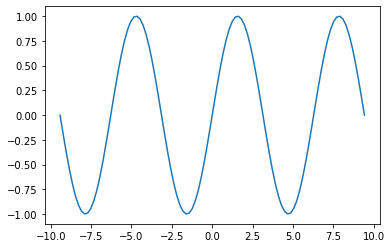

In [19]:
plt.plot(x, y)

Let us quickly generate some random data and draw a scatter plot with `numpy`'s `random` module.

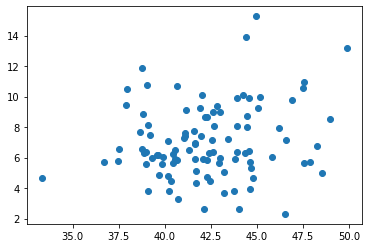

In [20]:
x = np.random.normal(42, 3, 100)
y = np.random.gamma(7, 1, 100)

plt.scatter(x, y)